<a href="https://colab.research.google.com/github/annalualves/DataScience-/blob/main/MachineLearing_ClassificacaoSKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#features (1 sim, 0 não)
#longo?
#perna curta?
#faz auau?
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

#1 = porco, 0 = cachorro
treino_x  = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]

treino_y = [1, 1, 1, 0, 0, 0]

from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [20]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [21]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0,1,1]
previsoes = model.predict(teste_x) 

In [25]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/ total
print("Taxa de acerto: %.2f" % (taxa_de_acerto * 100))

Taxa de acerto: 66.67


In [26]:
from sklearn.metrics import accuracy_score
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto: %.2f" % (taxa_de_acerto * 100))

Taxa de acerto: 66.67


**PARTE 2** 

In [29]:
import pandas as pd 
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [33]:
x = dados[[ "home", "how_it_works", "contact"]]
y = dados["bought"]
y.head()


0    0
1    0
2    0
3    0
4    0
Name: bought, dtype: int64

In [34]:
dados.shape

(99, 4)

In [39]:
treino_x =  x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [41]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [46]:
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi: %.2f%%" % (acuracia * 100))

A acurácia foi: 95.83%


**ESTATÍSTICA SPLITS (Separando treino e teste)**

In [63]:
from sklearn.model_selection import train_test_split

SEED = 20 

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 74 elementos e testaremos com 25 elementos


In [64]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [69]:
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi: %.2f%%" % (acuracia * 100))

A acurácia foi: 96.00%


In [70]:
treino_y.value_counts() #proporção +/- 2 para 1 

0    47
1    27
Name: bought, dtype: int64

In [71]:
teste_y.value_counts() #proporção 3 para 1
#proporções diferentes no treino e no teste (importante seguir uma proporção padrão para os dois)

0    19
1     6
Name: bought, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

SEED = 20 

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi: %.2f%%" % (acuracia * 100))

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi: 96.00%


In [73]:
treino_y.value_counts() #proporção 2 para 1

0    49
1    25
Name: bought, dtype: int64

In [74]:
teste_y.value_counts() #proporção 2 para 1

0    17
1     8
Name: bought, dtype: int64

**Testando em duas dimensões**

In [75]:
import pandas as pd 
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [82]:
trocar = { 0 : 1, 1 :0} 
dados['finish'] = dados.unfinished.map(trocar)

dados.tail()

,unfinished,expected_hours,price,finish
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


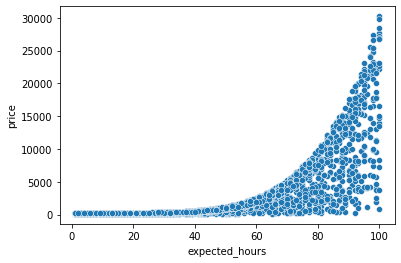

In [113]:
import seaborn as sns
sns.scatterplot(x = "expected_hours", y= "price", data= dados)

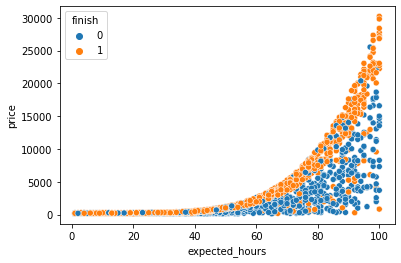

In [114]:
sns.scatterplot(x = "expected_hours", y= "price", hue = "finish", data= dados)

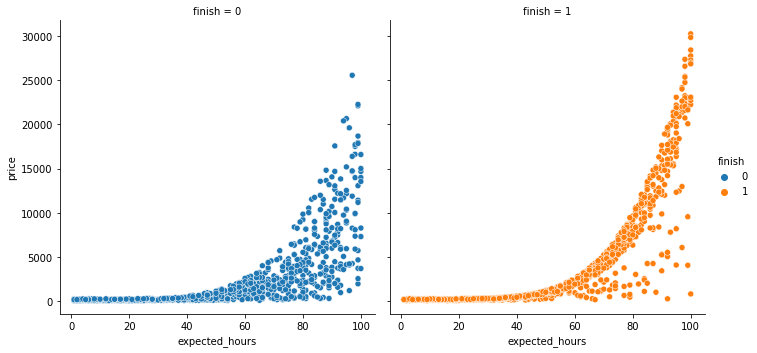

In [115]:
sns.relplot(x = "expected_hours", y= "price",hue = "finish", col = "finish", data= dados)

In [116]:
x = dados[['expected_hours', 'price']]
y = dados['finish']

from sklearn.model_selection import train_test_split

SEED = 20 

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi: %.2f%%" % (acuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi: 47.41%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [117]:
import numpy as np
previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y, previsoes_de_base)
print("A acurácia foi: %.2f%%" % (acuracia * 100))

A acurácia foi: 52.59%


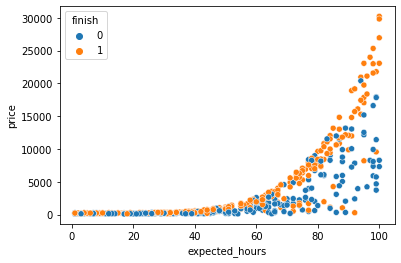

In [121]:
sns.scatterplot(x = "expected_hours", y= "price", hue = teste_y, data= teste_x)

**Estimadores não lineares e support vector machine**

In [122]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.expected_hours.min()
x_max = data_x.expected_hours.max()
y_min = data_y.price.min()
y_max = data_y.price.max()

pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min) / pixels)

xx , yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_ [xx.ravel(), yy.ravel()]

TypeError: ignored